## **Classification using K-Nearest Neighbors**

Load the IRIS data

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Create class label/vector.

In [ ]:
class_labels = iris["species"].unique()

print(f'Class labels are {class_labels}')

Class labels are ['setosa' 'versicolor' 'virginica']


Splitting data into Train, cross-validation and test sets with Stratified Sampling using *train_test_split()*

In [ ]:
df = iris.drop(['species'], axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split

X = iris.iloc[: , :-1]
y = iris.iloc[: , -1:]

X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.4, random_state=531)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, test_size=0.5, random_state=135)

In [ ]:
def getShape(name, dataset):
  print(f'Shape of {name} is {dataset.shape[0]} * {dataset.shape[1]}')

getShape('X', X)
getShape('X_train', X_train)
getShape('X_valid', X_valid)
getShape('X_test', X_test)

Shape of X is 150 * 4
Shape of X_train is 90 * 4
Shape of X_valid is 30 * 4
Shape of X_test is 30 * 4


Data Preprocessing using column standardisation. Use sklearn.preprocessing.StandardScaler(). 

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

Write your own implementation of K-NN

In [ ]:
def getEuclideanDistance(a, b):
  return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
def getAccuracyAndError(A, B):
  correct_predictions = 0

  for i in range(len(A)):
    if A[i] == B[i]:
      correct_predictions += 1
  
  accuracy = correct_predictions / len(A)
  error = (len(A) - correct_predictions) / len(A)
  
  return accuracy, error

In [ ]:
def knn(X_train, y_train, X_input, y_input, k):
  y_pred = []
  
  for x_input in X_input:
    distances = []

    for i in range(len(X_train)):
      distances.append([ getEuclideanDistance(np.array(x_input) , np.array(X_train[i])), y_train["species"].to_numpy()[i] ])
    
    distances.sort(key = lambda x: x[0])
    k_nearest_points = distances[:k]

    classes = [ ['setosa', 0], ['versicolor', 0], ['virginica', 0] ]

    for point in k_nearest_points:
      if point[1] == 'setosa':
        classes[0][1] += 1
      elif point[1] == 'versicolor':
        classes[1][1] += 1
      else:
        classes[2][1] += 1
    
    classes.sort(key = lambda x: x[1], reverse=True)

    y_pred.append(classes[0][0])
  
  accuracy, error = getAccuracyAndError(y_pred, y_input["species"].to_numpy())

  return accuracy, error

Perform hyper-parameter tuning. Here, K is a hyperparameter. <br>

Compute training accuracy and cross-validation accuracy for every value of K in [1,3,5,7,9,11,13,15,17,19,21,23,25] and choose the best K.


In [ ]:
def getResults(X_train, y_train, X_valid, y_valid):
  K = [1,3,5,7,9,11,13,15,17,19,21,23,25]
  accuraciesAndErrors = []
  errors = []

  for k in K:
    train_accuracy, train_error = knn(X_train, y_train, X_train, y_train, k)
    crossval_accuracy, crossval_error = knn(X_train, y_train, X_valid, y_valid, k)

    accuraciesAndErrors.append([ k, round(train_accuracy * 100, 2), round(crossval_accuracy * 100, 2), round(train_error * 100, 2), round(crossval_error * 100, 2) ])

  results = pd.DataFrame(accuraciesAndErrors, columns = ['K', 'Training Accuracy', 'Cross-Validation Accuracy', 'Training Error', 'Cross-Validation Error'])

  return results

In [ ]:
print(f"Displaying Training and Cross-Validation Accuracies for different values of K:\n")

results = getResults(X_train, y_train, X_valid, y_valid)
display(results[['K', 'Training Accuracy', 'Cross-Validation Accuracy']])

Displaying Training and Cross-Validation Accuracies for different values of K:



,K,Training Accuracy,Cross-Validation Accuracy
0,1,100.00,93.33
1,3,94.44,96.67
2,5,95.56,90.00
3,7,97.78,96.67
4,9,95.56,96.67
5,11,95.56,90.00
6,13,94.44,90.00
7,15,94.44,86.67
8,17,94.44,86.67
9,19,91.11,90.00


Plot the "Hyperparameter vs. accuracy" graph for training and CV sets.

In [ ]:
import matplotlib.pyplot as plt

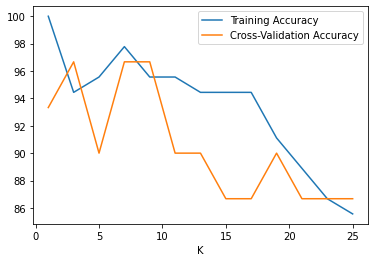

In [ ]:
results.plot(x='K', y=['Training Accuracy', 'Cross-Validation Accuracy'], kind="line")
plt.show()

Plot the training and CV errors graphs w.r.t. different values of K. Write your observations for overfitting and underfitting.

In [ ]:
print(f"Displaying Training and Cross-Validation Errors for different values of K:\n")

display(results[['K', 'Training Error', 'Cross-Validation Error']])

Displaying Training and Cross-Validation Errors for different values of K:



,K,Training Error,Cross-Validation Error
0,1,0.00,6.67
1,3,5.56,3.33
2,5,4.44,10.00
3,7,2.22,3.33
4,9,4.44,3.33
5,11,4.44,10.00
6,13,5.56,10.00
7,15,5.56,13.33
8,17,5.56,13.33
9,19,8.89,10.00


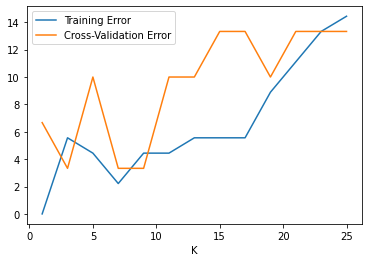

In [ ]:
results.plot(x='K', y=['Training Error', 'Cross-Validation Error'], kind="line")
plt.show()

From the graph, we can make the following observations:
- For k=21, the graph is giving max error in both training and cross-validation sets, there it is a case of underfitting.
- For k=3,5,7,9 , the cross-validation set is giving min error of 0.00 %, therefore it is a case of overfitting.

Test the performance of your model on Test sets.

In [ ]:
accuracy, error = knn(X_train, y_train, X_test, y_test, 3)
print(f"We are selecting k=3 as optimal number of neighbors.")
print(f"  Accuracy = {round(accuracy * 100, 2)} %")
print(f"  Error = {round(error * 100, 2)} %")

We are selecting k=3 as optimal number of neighbors.
  Accuracy = 96.67 %
  Error = 3.33 %


using sklearn knn


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

train_accuracy = clf.score(X_train, y_train)
valid_accuracy = clf.score(X_valid, y_valid)
test_accuracy = clf.score(X_test, y_test)

print(f"Results using sklearn's KNN implementation are:")
print(f"  Train Accuracy = {round(train_accuracy * 100, 2)} %")
print(f"  Cross-Validation Accuracy = {round(valid_accuracy * 100, 2)} %")
print(f"  Test Accuracy = {round(test_accuracy * 100, 2)} %")

Results using sklearn's KNN implementation are:
  Train Accuracy = 94.44 %
  Cross-Validation Accuracy = 96.67 %
  Test Accuracy = 96.67 %


Compare your implementation with sk-learn's implementation of KNN

**Thus, our model and sklearn's KNN model are giving the same results.**